# Travel Planner Based On Currency Conversion Risk -- Dashboard

### Import Library

In [1]:
import os
import requests
import pandas as pd
import pandas_datareader as pdr

from pandas_datareader import data as wb
import seaborn as sns

from dotenv import load_dotenv
import numpy as np
%matplotlib inline
import json
from forex_python.converter import CurrencyRates
import datetime as dt
from countryinfo import CountryInfo

from yahoofinancials import YahooFinancials

import plotly.express as px
from pathlib import Path
#Interactive Plot 
import plotly.offline as pyo
#Candlestick Chart
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

from MCForecastTools import MCSimulation

import panel as pn
pn.extension('plotly')

### Load Enviornments 

In [2]:
# Load .env enviroment variables
load_dotenv()

# Set up API credentials

# Set Alpha Vantage API key 
# Set Alpha Vantage API key 
alpha_vantage_api_key = os.getenv("ALPHA_VANTAGE_API")
alpha_vantage_api_key2 = os.getenv("ALPHA_VANTAGE_AP2")
alpha_vantage_api_key3 = os.getenv("ALPHA_VANTAGE_API3")

# Verify that Alpha Vantage key was correctly loaded
print(f"Alpha Vantage Key type: {type(alpha_vantage_api_key)}")


# Set the Mapbox API key
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)
# Verify that Mapbox API key was correctly loaded
print(f"Mapbox Key type: {type(map_box_api)}")

Alpha Vantage Key type: <class 'str'>
Mapbox Key type: <class 'str'>


## Variables

In [3]:
sims=5
name = "Singapore"
country_name = CountryInfo(name).name()
country_border= CountryInfo(name).borders()
country_capital= CountryInfo(name).capital()
country_currency = CountryInfo(name).currencies()
country_timezone = CountryInfo(name).timezones()
country_wiki = CountryInfo(name).wiki()
country_info = print(f"Country name: {country_name}", '\n'
                      f"Country Capital: {country_capital}", '\n'
                      f"Country Border: {country_border}", '\n' 
                      f"Country Currency: {country_currency}", '\n' 
                      f"Country Timezone: {country_timezone}", '\n'
                      f"Country Wiki: {country_wiki}")
#-
name_2 = "Turkey"
country_name_2 = CountryInfo(name_2).name()
country_border_2= CountryInfo(name_2).borders()
country_capital_2= CountryInfo(name_2).capital()
country_currency_2 = CountryInfo(name_2).currencies()
country_timezone_2 = CountryInfo(name_2).timezones()
country_wiki_2 = CountryInfo(name_2).wiki()
country_info_2 = print(f"Country name: {country_name_2}", '\n'
                      f"Country Capital: {country_capital_2}", '\n'
                      f"Country Border: {country_border_2}", '\n' 
                      f"Country Currency: {country_currency_2}", '\n' 
                      f"Country Timezone: {country_timezone_2}", '\n'
                      f"Country Wiki: {country_wiki_2}")
#-
name_3 = "United Kingdom"
country_name_3 = CountryInfo(name_3).name()
country_border_3= CountryInfo(name_3).borders()
country_capital_3= CountryInfo(name_3).capital()
country_currency_3 = CountryInfo(name_3).currencies()
country_timezone_3 = CountryInfo(name_3).timezones()
country_wiki_3 = CountryInfo(name_3).wiki()
country_info_3 = print(f"Country name: {country_name_3}", '\n'
                      f"Country Capital: {country_capital_3}", '\n'
                      f"Country Border: {country_border_3}", '\n' 
                      f"Country Currency: {country_currency_3}", '\n' 
                      f"Country Timezone: {country_timezone_3}", '\n'
                      f"Country Wiki: {country_wiki_3}")
#-
pair = country_currency[0].strip("''")
forex_pair = pair + "USD"
pair_2 = country_currency_2[0].strip("''")
forex_pair_2 = pair_2 + "USD"
pair_3 = country_currency_3[0].strip("''")
forex_pair_3 = pair_3 + "USD"
#-
time_series = pdr.av.time_series.AVTimeSeriesReader(forex_pair, api_key='alpha_vantage_api_key')
forex = time_series.read()
forex.index = pd.to_datetime(forex.index, format='%Y-%m-%d')
Forex = forex
time_series_2 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_2, api_key='alpha_vantage_api_key2')
forex_2 = time_series_2.read()
forex_2.index = pd.to_datetime(forex_2.index, format='%Y-%m-%d')
Forex_2 = forex_2
time_series_3 = pdr.av.time_series.AVTimeSeriesReader(forex_pair_3, api_key='alpha_vantage_api_key3')
forex_3 = time_series_3.read()
forex_3.index = pd.to_datetime(forex_3.index, format='%Y-%m-%d')
Forex_3 = forex_3
#-
forex_close = Forex.drop(columns=['volume', 'open', 'high', 'low'])
forex_2_close = Forex_2.drop(columns=['volume', 'open', 'high', 'low'])
forex_3_close = Forex_3.drop(columns=['volume', 'open', 'high', 'low'])
#-
joined_forex = pd.concat([forex_close, forex_2_close, forex_3_close], axis="columns", join="inner", keys=[f'{forex_pair}',f'{forex_pair_2}',f'{forex_pair_3}'])
#-
forex_stats = forex.describe()
forex_stats_2 = forex_2.describe()
forex_stats_3 = forex_3.describe()
#-
forex['MA20'] = forex['close'].rolling(window=20, min_periods=0).mean()
forex['std'] = forex['close'].rolling(window=20, min_periods=0).std(ddof = 0)
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair, 'Volume'), 
               row_width=[0.2, 0.7])
#-
forex_2['MA20'] = forex_2['close'].rolling(window=20, min_periods=0).mean()
forex_2['std'] = forex_2['close'].rolling(window=20, min_periods=0).std(ddof = 0)
fig_2 = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_2, 'Volume'), 
               row_width=[0.2, 0.7])

#-
forex_3['MA20'] = forex_3['close'].rolling(window=20, min_periods=0).mean()
forex_3['std'] = forex_3['close'].rolling(window=20, min_periods=0).std(ddof = 0)
fig_3 = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.10, subplot_titles=(forex_pair_3, 'Volume'), 
               row_width=[0.2, 0.7])
#-
ticker_data = pd.concat([forex], axis=1, keys=[f'{forex_pair}'])
ticker_data_2 = pd.concat([forex_2], axis=1, keys=[f'{forex_pair_2}'])
ticker_data_3 = pd.concat([forex_3], axis=1, keys=[f'{forex_pair_3}'])
#-
yahoo_financials = YahooFinancials('DX-Y.NYB')
read_us_dollar = YahooFinancials('DX-Y.NYB')
us_dollar = read_us_dollar.get_historical_price_data('2010-04-23', '2022-04-23', 'daily')
us_dollar_price = us_dollar["DX-Y.NYB"]["prices"]
us_dollar_df = pd.DataFrame(us_dollar_price)
us_dollar_df.set_index(pd.to_datetime(us_dollar_df['formatted_date'], infer_datetime_format=True), inplace=True)
us_dollar_df.drop(columns=['date', 'open', 'high', 'low', 'volume', 'adjclose', 'formatted_date'], inplace=True)
us_dollar_df.columns=['US Dollar Close']
us_dollar_df.isnull().sum()
us_dollar_df = us_dollar_df.dropna()
us_dollar_daily_returns = us_dollar_df.pct_change().dropna()
us_dollar_daily_returns.columns=['US Dollar Daily Returns']
#-
forex_daily_returns = forex_close.pct_change().dropna()
forex_daily_returns.columns=[f'{forex_pair} Daily Returns']
forex_2_daily_returns = forex_2_close.pct_change().dropna()
forex_2_daily_returns.columns=[f'{forex_pair_2} Daily Returns']
forex_3_daily_returns = forex_3_close.pct_change().dropna()
forex_3_daily_returns.columns=[f'{forex_pair_3} Daily Returns']
#-
joined_forex_daily_returns = pd.concat([forex_daily_returns, forex_2_daily_returns, forex_3_daily_returns], axis='columns', join='inner')
joined_data = pd.concat([joined_forex_daily_returns, us_dollar_daily_returns], axis='columns', join='inner')
#-
cum_returns = (1+joined_data).cumprod()
#-
joined_data_daily_returns_std = joined_data.std()
isolated_dollar = joined_data['US Dollar Daily Returns'].std()
annualized_std = joined_data_daily_returns_std * np.sqrt(252)
joined_forex_21_day_std = joined_data.rolling(window = 21).std()
#-
correlation = joined_data.corr()
covariance = (joined_data[f'{forex_pair} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
variance = joined_data['US Dollar Daily Returns'].var()
beta = covariance / variance
covariance_2 = (joined_data[f'{forex_pair_2} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
variance_2 = joined_data['US Dollar Daily Returns'].var()
beta_2 = covariance_2 / variance_2
covariance_3 = (joined_data[f'{forex_pair_3} Daily Returns'].cov(joined_data['US Dollar Daily Returns']))
variance_3 = joined_data['US Dollar Daily Returns'].var()
beta_3 = covariance / variance
#-
combined_data_sharpe_ratios = (joined_data.mean() * 252) / (joined_data_daily_returns_std * np.sqrt(252))
#-
csvpath = Path("all_countries.csv")
country_list_df = pd.read_csv(csvpath)
capital_city = []
lat_long = []
currency = []
subregion = []
wiki = []
lat = []
long = []
for country in country_list_df['Country']:
    country_data = CountryInfo(country)
    capital_city.append(country_data.capital())
    lat.append(country_data.capital_latlng()[0])
    long.append(country_data.capital_latlng()[1])
    currency.append(country_data.currencies())
    subregion.append(country_data.subregion())
    wiki.append(country_data.wiki()) 
country_list_df['Capital City'] = capital_city
country_list_df['Latitude'] = lat
country_list_df['Longitude'] = long
country_list_df['Currency'] = currency
country_list_df['Sub-Region'] = subregion
country_list_df['wiki'] = wiki


Country name: singapore 
Country Capital: Singapore 
Country Border: [] 
Country Currency: ['SGD'] 
Country Timezone: ['UTC+08:00'] 
Country Wiki: http://en.wikipedia.org/wiki/singapore
Country name: turkey 
Country Capital: Ankara 
Country Border: ['ARM', 'AZE', 'BGR', 'GEO', 'GRC', 'IRN', 'IRQ', 'SYR'] 
Country Currency: ['TRY'] 
Country Timezone: ['UTC+02:00'] 
Country Wiki: http://en.wikipedia.org/wiki/turkey
Country name: united kingdom 
Country Capital: London 
Country Border: ['IRL'] 
Country Currency: ['GBP'] 
Country Timezone: ['UTC−08:00', 'UTC−05:00', 'UTC−04:00', 'UTC−03:00', 'UTC−02:00', 'UTC', 'UTC+01:00', 'UTC+02:00', 'UTC+06:00'] 
Country Wiki: http://en.wikipedia.org/wiki/united_kingdom


# Panel Visualizations

## Function

In [4]:
def singapore_plot():
    singapore_plot = forex[['close']].plot()
    return singapore_plot
#


#     xlabel= "Dates", 
#     ylabel = f'{forex_pair}',
#     rot = 45,
#     title = f"Closing value of {forex_pair}",
#     color = "dodgerblue",
#     figsize = (20, 10)).legend(loc="lower right");
    

def turkey_plot():
    turkey_plot = forex_2[['close']].plot()
   
    return turkey_plot
#
def uk_plot():
    uk_plot = forex_3[['close']].plot()
    
    return uk_plot
#

def singapore_candle_stick_plot():
    # Volume
    brazil_candle_stick_plot = fig.add_trace(go.Bar(x=forex.index, y=forex['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
    fig.add_trace(go.Scatter(x=forex.index, y=forex["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)

# Candlestick chart
    fig.add_trace(go.Candlestick(x=forex.index, open=forex["open"], high=forex["high"],
                low=forex["low"], close=forex["close"], name="OHLC"), 
                row=1, col=1)

# Create a Bollinger Band

# Upper Bound
    fig.add_trace(go.Scatter(x=forex.index, 
                         y=forex["MA20"] + (forex['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         name = 'upper band',
                         opacity = 0.5),
              row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
    fig.add_trace(go.Scatter(x=forex.index, 
                         y=forex["MA20"] - (forex['std'] * 2),
                         line_color = 'gray',
                         line = {'dash': 'dash'},
                         fill = 'tonexty',
                         name = 'lower band',
                         opacity = 0.01),
              row = 1, col = 1)


    fig.update_layout(
#    title= f'{forex_pair} Historical price chart',
        xaxis_tickfont_size=12,
        yaxis=dict(
            title='Price ($/share)',
            titlefont_size=14,
            tickfont_size=12,
        ),
        autosize=True,
        width=900,
        height=900,
        margin=dict(l=50, r=50, b=100, t=100, pad=4),
        paper_bgcolor='gainsboro'
    
    )
# Remove range slider; (short time frame)
    fig.update(layout_xaxis_rangeslider_visible=False)

    return brazil_candle_stick_plot
#-

def turkey_candle_stick_plot():

# Volume
    france_candle_stick_plot =fig_2.add_trace(go.Bar(x=forex_2.index, y=forex_2['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
    fig_2.add_trace(go.Scatter(x=forex_2.index, y=forex_2["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
    fig_2.add_trace(go.Candlestick(x=forex_2.index, open=forex_2["open"], high=forex_2["high"],
                    low=forex_2["low"], close=forex_2["close"], name="OHLC"), 
                    row=1, col=1)


# Create a Bollinger Band

# Upper Bound
    fig_2.add_trace(go.Scatter(x=forex_2.index, 
                             y=forex_2["MA20"] + (forex_2['std'] * 2),
                             line_color = 'gray',
                             line = {'dash': 'dash'},
                             name = 'upper band',
                             opacity = 0.5),
                  row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
    fig_2.add_trace(go.Scatter(x=forex_2.index, 
                             y=forex_2["MA20"] - (forex_2['std'] * 2),
                             line_color = 'gray',
                             line = {'dash': 'dash'},
                             fill = 'tonexty',
                             name = 'lower band',
                             opacity = 0.01),
                  row = 1, col = 1)


    fig_2.update_layout(
#    title= f'{forex_pair_2} Historical price chart',
        xaxis_tickfont_size=12,
        yaxis=dict(
            title='Price ($/share)',
            titlefont_size=14,
            tickfont_size=12,
        ),
        autosize=True,
        width=900,
        height=900,
        margin=dict(l=50, r=50, b=100, t=100, pad=4),
        paper_bgcolor='LightSteelBlue'
    
    )
# Remove range slider; (short time frame)
    fig_2.update(layout_xaxis_rangeslider_visible=False)

    return france_candle_stick_plot
#-

def uk_candle_stick_plot():
    
# Volume
    uk_candle_stick_plot = fig_3.add_trace(go.Bar(x=forex_3.index, y=forex_3['volume'], marker_color='lime', showlegend=False), row=2, col=1)

# 20 period moving average
    fig_3.add_trace(go.Scatter(x=forex_3.index, y=forex_3["MA20"], marker_color='tomato',name="MA20"), row=1, col=1)



# Candlestick chart
    fig_3.add_trace(go.Candlestick(x=forex_3.index, open=forex_3["open"], high=forex_3["high"],
                    low=forex_3["low"], close=forex_3["close"], name="OHLC"), 
                    row=1, col=1)


# Create a Bollinger Band

# Upper Bound
    fig_3.add_trace(go.Scatter(x=forex_3.index, 
                             y=forex_3["MA20"] + (forex_3['std'] * 2),
                             line_color = 'gray',
                             line = {'dash': 'dash'},
                             name = 'upper band',
                             opacity = 0.5),
                  row = 1, col = 1)

# Lower Bound fill in between with parameter 'fill': 'tonexty'
    fig_3.add_trace(go.Scatter(x=forex_3.index, 
                             y=forex_3["MA20"] - (forex_3['std'] * 2),
                             line_color = 'gray',
                             line = {'dash': 'dash'},
                             fill = 'tonexty',
                             name = 'lower band',
                             opacity = 0.01),
                  row = 1, col = 1)


    fig.update_layout(
#    title= f'{forex_pair_2} Historical price chart',
        xaxis_tickfont_size=12,
        yaxis=dict(
            title='Price ($/share)',
            titlefont_size=14,
            tickfont_size=12,
        ),
        autosize=True,
        width=900,
        height=900,
        margin=dict(l=50, r=50, b=100, t=100, pad=4),
        paper_bgcolor='LightSteelBlue'
    
    )
# Remove range slider; (short time frame)
    fig_3.update(layout_xaxis_rangeslider_visible=False)

    return uk_candle_stick_plot

#-
def singapore_currency_converter():
    brazil_currency_converter = currency, amount = CurrencyRates(), int(1000)
    from_currency, to_currency = "USD", pair.upper()
    result =  currency.convert(from_currency, to_currency, amount)
    print("Conversion Amount: ", result)

    return brazil_currency_converter
#- 
def turkey_currency_converter():
    france_currency_converter = currency, amount = CurrencyRates(), int(1000)
    from_currency, to_currency = "USD", pair_2.upper()
    result =  currency.convert(from_currency, to_currency, amount)
    print("Conversion Amount: ", result)
    return france_currency_converter
#-
def uk_currency_converter():
    uk_currency_converter = currency, amount = CurrencyRates(), int(1000)
    from_currency, to_currency = "USD", pair_3.upper()
    result =  currency.convert(from_currency, to_currency, amount)
    print("Conversion Amount: ", result)
    return uk_currency_converter
#-
def singapore_monte_carlo_3_months():
    singapore_monte_carlo_3_months = forex_montecarlo = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = sims,
    num_trading_days = 21 * 3)
    forex_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot = forex_montecarlo.plot_simulation()
    simulated_returns_data = {
    "mean": list(forex_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_montecarlo.simulated_return.max(axis=1))
    }
    df_simulated_returns = pd.DataFrame(simulated_returns_data)
    df_simulated_returns.plot(title=f"Simulated Daily Returns Behavior of {forex_pair} Over the Next 3 Months")
    initial_investment = 1000
    cumulative_pnl = initial_investment * df_simulated_returns
    cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {forex_pair} Over the Next 3 Months")
    tbl = forex_montecarlo.summarize_cumulative_return()
    ci_lower = round(tbl[8]*1000,2)
    ci_upper = round(tbl[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower} and ${ci_upper},"
      f" by the time of your projected vacation.")
    return singapore_monte_carlo_3_months
    
#-
def singapore_monte_carlo_6_months():
    singapore_monte_carlo_6_months = forex_montecarlo = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = sims,
    num_trading_days = 21 * 6)
    forex_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot = forex_montecarlo.plot_simulation()
    simulated_returns_data = {
    "mean": list(forex_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_montecarlo.simulated_return.max(axis=1))
    }
    df_simulated_returns = pd.DataFrame(simulated_returns_data)
    df_simulated_returns.plot(title=f"Simulated Daily Returns Behavior of {forex_pair} Over the Next 6 Months")
    initial_investment = 1000
    cumulative_pnl = initial_investment * df_simulated_returns
    cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {forex_pair} Over the Next 6 Months")
    tbl = forex_montecarlo.summarize_cumulative_return()
    ci_lower = round(tbl[8]*1000,2)
    ci_upper = round(tbl[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower} and ${ci_upper},"
      f" by the time of your projected vacation.")
    return singapore_monte_carlo_6_months
    
#-
def singapore_monte_carlo_12_months():
    singapore_monte_carlo_6_months = forex_montecarlo = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = sims,
    num_trading_days = 21 * 12)
    forex_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot = forex_montecarlo.plot_simulation()
    simulated_returns_data = {
    "mean": list(forex_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_montecarlo.simulated_return.max(axis=1))
    }
    df_simulated_returns = pd.DataFrame(simulated_returns_data)
    df_simulated_returns.plot(title=f"Simulated Daily Returns Behavior of {forex_pair} Over the Next 12 Months")
    initial_investment = 1000
    cumulative_pnl = initial_investment * df_simulated_returns
    cumulative_pnl.plot(title=f"Simulated Outcomes Behavior of {forex_pair} Over the Next 12 Months")
    tbl = forex_montecarlo.summarize_cumulative_return()
    ci_lower = round(tbl[8]*1000,2)
    ci_upper = round(tbl[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower} and ${ci_upper},"
      f" by the time of your projected vacation.")
    return singapore_monte_carlo_6_months
#-
def turkey_monte_carlo_3_months():
    turkey_monte_carlo_3_months = forex_2_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 3)
    forex_2_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_2 = forex_2_montecarlo.plot_simulation() 
    simulated_returns_data_2 = {
    "mean": list(forex_2_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_2_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_2_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_2_montecarlo.simulated_return.max(axis=1))}
    df_simulated_returns_2 = pd.DataFrame(simulated_returns_data_2)
    df_simulated_returns_2.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_2} Over the Next 3 Months")
    initial_investment = 1000
    cumulative_pnl_2 = initial_investment * df_simulated_returns_2
    cumulative_pnl_2.plot(title=f"Simulated Outcomes Behavior of {forex_pair_2} Over the Next 3 Months")
    tbl_2 = forex_2_montecarlo.summarize_cumulative_return()
    ci_lower_2 = round(tbl_2[8]*1000,2)
    ci_upper_2 = round(tbl_2[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower_2} and ${ci_upper_2},"
      f" by the time of your projected vacation.")
    return turkey_monte_carlo_3_months
#-
def turkey_monte_carlo_6_months():
    turkey_monte_carlo_6_months = forex_2_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 6)
    forex_2_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_2 = forex_2_montecarlo.plot_simulation() 
    simulated_returns_data_2 = {
    "mean": list(forex_2_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_2_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_2_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_2_montecarlo.simulated_return.max(axis=1))}
    df_simulated_returns_2 = pd.DataFrame(simulated_returns_data_2)
    df_simulated_returns_2.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_2} Over the Next 6 Months")
    initial_investment = 1000
    cumulative_pnl_2 = initial_investment * df_simulated_returns_2
    cumulative_pnl_2.plot(title=f"Simulated Outcomes Behavior of {forex_pair_2} Over the Next 6 Months")
    tbl_2 = forex_2_montecarlo.summarize_cumulative_return()
    ci_lower_2 = round(tbl_2[8]*1000,2)
    ci_upper_2 = round(tbl_2[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower_2} and ${ci_upper_2},"
      f" by the time of your projected vacation.")
    return turkey_monte_carlo_6_months
#-   
def turkey_monte_carlo_12_months():
    turkey_monte_carlo_12_months = forex_2_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 12)
    forex_2_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_2 = forex_2_montecarlo.plot_simulation() 
    simulated_returns_data_2 = {
    "mean": list(forex_2_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_2_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_2_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_2_montecarlo.simulated_return.max(axis=1))}
    df_simulated_returns_2 = pd.DataFrame(simulated_returns_data_2)
    df_simulated_returns_2.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_2} Over the Next 12 Months")
    initial_investment = 1000
    cumulative_pnl_2 = initial_investment * df_simulated_returns_2
    cumulative_pnl_2.plot(title=f"Simulated Outcomes Behavior of {forex_pair_2} Over the Next 12 Months")
    tbl_2 = forex_2_montecarlo.summarize_cumulative_return()
    ci_lower_2 = round(tbl_2[8]*1000,2)
    ci_upper_2 = round(tbl_2[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower_2} and ${ci_upper_2},"
      f" by the time of your projected vacation.")
    return turkey_monte_carlo_12_months
#-   
def uk_monte_carlo_3_months():
    uk_monte_carlo_3_months = forex_3_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 3)
    forex_3_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_3 = forex_3_montecarlo.plot_simulation()
    simulated_returns_data_3 = {
    "mean": list(forex_3_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_3_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_3_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_3_montecarlo.simulated_return.max(axis=1))}
    df_simulated_returns_3 = pd.DataFrame(simulated_returns_data_3)
    df_simulated_returns_3.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_3} Over the Next 3 Months")
    initial_investment = 1000
    cumulative_pnl_3 = initial_investment * df_simulated_returns_3
    cumulative_pnl_3.plot(title=f"Simulated Outcomes Behavior of {forex_pair_3} Over the Next 3 Months")
    tbl_3 = forex_3_montecarlo.summarize_cumulative_return()
    ci_lower_3 = round(tbl_3[8]*1000,2)
    ci_upper_3 = round(tbl_3[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower_3} and ${ci_upper_3},"
      f" by the time of your projected vacation.")
    return uk_monte_carlo_3_months
#-

def uk_monte_carlo_6_months():
    uk_monte_carlo_6_months = forex_3_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 6)
    forex_3_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_3 = forex_3_montecarlo.plot_simulation()
    simulated_returns_data_3 = {
    "mean": list(forex_3_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_3_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_3_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_3_montecarlo.simulated_return.max(axis=1))}
    df_simulated_returns_3 = pd.DataFrame(simulated_returns_data_3)
    df_simulated_returns_3.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_3} Over the Next 6 Months")
    initial_investment = 1000
    cumulative_pnl_3 = initial_investment * df_simulated_returns_3
    cumulative_pnl_3.plot(title=f"Simulated Outcomes Behavior of {forex_pair_3} Over the Next 6 Months")
    tbl_3 = forex_3_montecarlo.summarize_cumulative_return()
    ci_lower_3 = round(tbl_3[8]*1000,2)
    ci_upper_3 = round(tbl_3[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower_3} and ${ci_upper_3},"
      f" by the time of your projected vacation.")
    return uk_monte_carlo_6_months
#-
def uk_monte_carlo_12_months():
    uk_monte_carlo_12_months = forex_3_montecarlo = MCSimulation(
    portfolio_data = ticker_data_2,
    num_simulation = sims,
    num_trading_days = 21 * 12)
    forex_3_montecarlo.calc_cumulative_return()
    pd.options.plotting.backend = 'matplotlib'
    line_plot_3 = forex_3_montecarlo.plot_simulation()
    simulated_returns_data_3 = {
    "mean": list(forex_3_montecarlo.simulated_return.mean(axis=1)),
    "median": list(forex_3_montecarlo.simulated_return.median(axis=1)),
    "min": list(forex_3_montecarlo.simulated_return.min(axis=1)),
    "max": list(forex_3_montecarlo.simulated_return.max(axis=1))}
    df_simulated_returns_3 = pd.DataFrame(simulated_returns_data_3)
    df_simulated_returns_3.plot(title=f"Simulated Daily Returns Behavior of {forex_pair_3} Over the Next 12 Months")
    initial_investment = 1000
    cumulative_pnl_3 = initial_investment * df_simulated_returns_3
    cumulative_pnl_3.plot(title=f"Simulated Outcomes Behavior of {forex_pair_3} Over the Next 12 Months")
    tbl_3 = forex_3_montecarlo.summarize_cumulative_return()
    ci_lower_3 = round(tbl_3[8]*1000,2)
    ci_upper_3 = round(tbl_3[9]*1000,2)
    print(f"There is a 95% chance that your travel budget of ${1000}"
      f" will end within the range of "
      f" ${ci_lower_3} and ${ci_upper_3},"
      f" by the time of your projected vacation.")
    return uk_monte_carlo_12_months
#-
def joined_data_plot():
    joined_data_plot = joined_data.plot(figsize=(20,10))
    return joined_data_plot
#-

def cumulative_returns_plot():
    cum_returns_plot = cum_returns.plot(figsize=(20,10))
    return cum_returns_plot
#-
        
def joined_data_box_plot():
    joined_data_box_plot = joined_data.plot.box(figsize=(20,10))
    return joined_data_box_plot
        
#-

def joined_forex_21_day_std_plot():
    joined_forex_21_day_std_plot = joined_forex_21_day_std.plot(figsize=(20, 10))
    return joined_forex_21_day_std_plot
        
#-
def heatmap():
    heatmap = sns.heatmap(correlation, vmin=-1, vmax=1)
    return heatmap

#-
def beta_plot():
    beta_plot = sns.lmplot(x = "US Dollar Daily Returns", y = f"{forex_pair} Daily Returns", data = joined_data, aspect = 1.5, fit_reg = True)
    return beta_plot

#- 
def beta_plot_2():
    beta_plot_2 = sns.lmplot(x = "US Dollar Daily Returns", y = f"{forex_pair_2} Daily Returns", data = joined_data, aspect = 1.5, fit_reg = True)
    return beta_plot_2

#- 
def beta_plot_3():
    beta_plot_3 = sns.lmplot(x = "US Dollar Daily Returns", y = f"{forex_pair_3} Daily Returns", data = joined_data, aspect = 1.5, fit_reg = True)
    return beta_plot_3

#- 


def combined_data_sharpe_ratio_plot():
    combined_data_sharpe_ratio_plot = combined_data_sharpe_ratios.plot(kind="bar", title= "Combined Data Sharpe Ratios");
    return combined_data_sharpe_ratio_plot
        
#-

def world_map():
    world_map = px.scatter_mapbox(
    country_list_df,
    lat='Latitude',
    lon='Longitude', 
    zoom=1.2,
    )
    return world_map
             

## Panel Dashboard

Conversion Amount:  1373.9928798950723
Running Monte Carlo simulation number 0.
There is a 95% chance that your travel budget of $1000 will end within the range of  $967.41 and $999.95, by the time of your projected vacation.
Running Monte Carlo simulation number 0.
There is a 95% chance that your travel budget of $1000 will end within the range of  $951.46 and $1016.95, by the time of your projected vacation.
Running Monte Carlo simulation number 0.
There is a 95% chance that your travel budget of $1000 will end within the range of  $982.79 and $1031.38, by the time of your projected vacation.
Conversion Amount:  14797.077009555931
Running Monte Carlo simulation number 0.
There is a 95% chance that your travel budget of $1000 will end within the range of  $872.72 and $1005.55, by the time of your projected vacation.
Running Monte Carlo simulation number 0.
There is a 95% chance that your travel budget of $1000 will end within the range of  $685.01 and $1295.25, by the time of your pro

C:\Users\mksta\anaconda3\envs\pyvizenv\envs\pyviz2\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



There is a 95% chance that your travel budget of $1000 will end within the range of  $817.59 and $1061.98, by the time of your projected vacation.
Running Monte Carlo simulation number 0.
There is a 95% chance that your travel budget of $1000 will end within the range of  $554.3 and $895.78, by the time of your projected vacation.


C:\Users\mksta\anaconda3\envs\pyvizenv\envs\pyviz2\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\mksta\anaconda3\envs\pyvizenv\envs\pyviz2\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Users\mksta\anaconda3\envs\pyvizenv\envs\pyviz2\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and ma

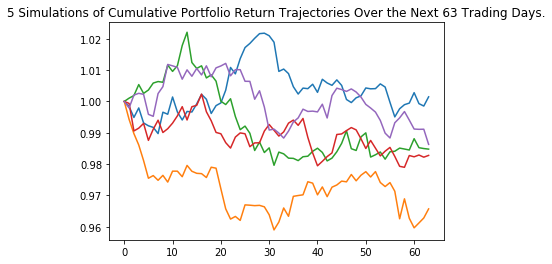

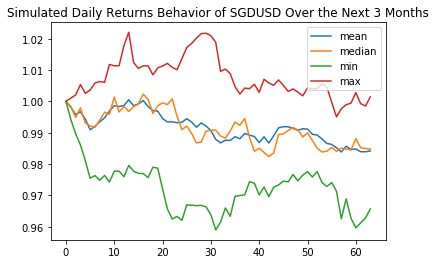

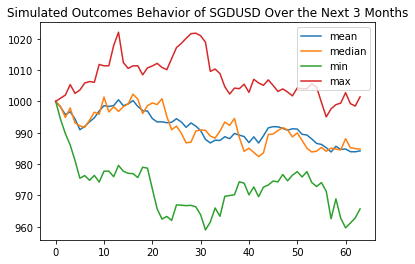

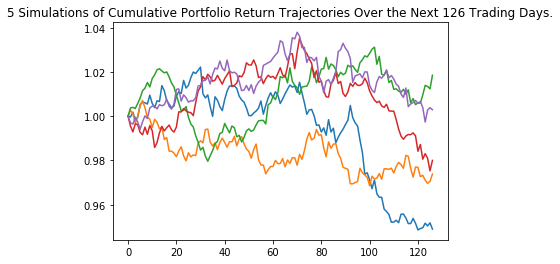

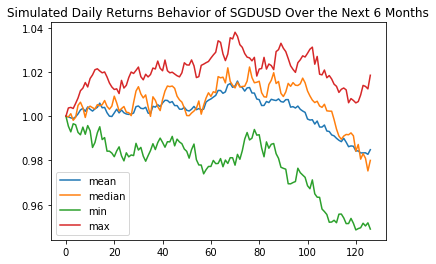

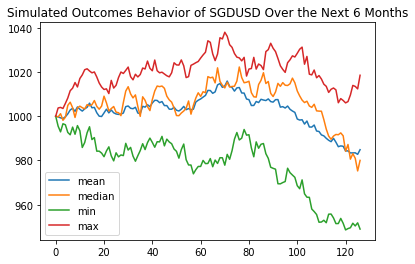

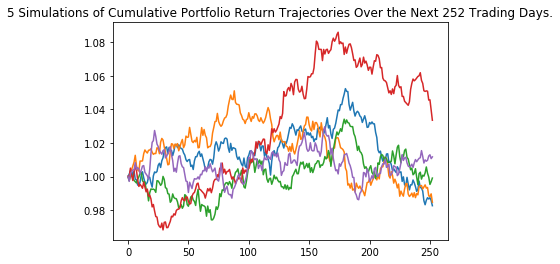

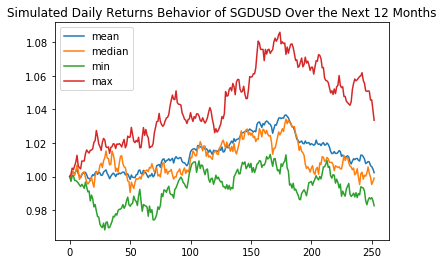

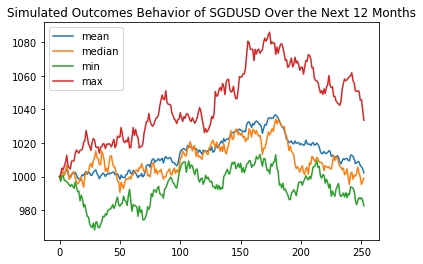

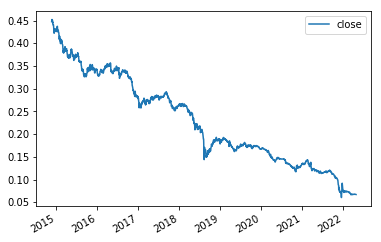

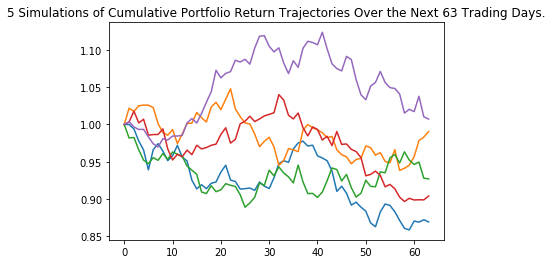

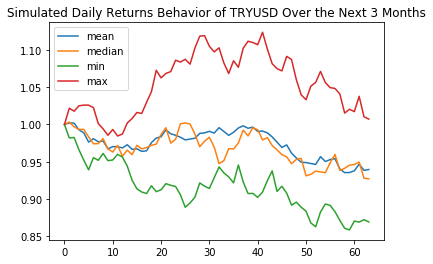

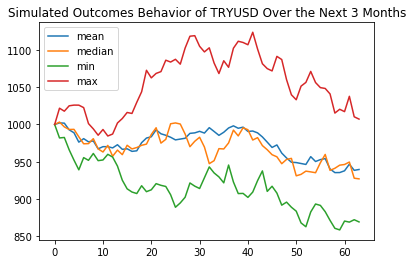

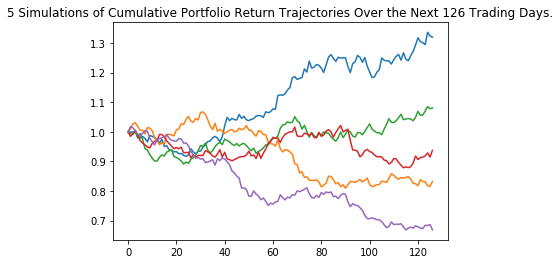

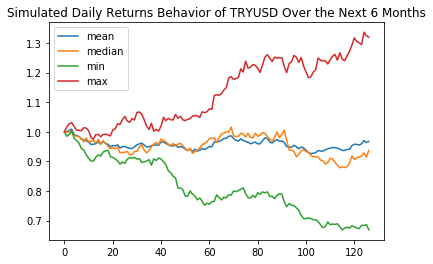

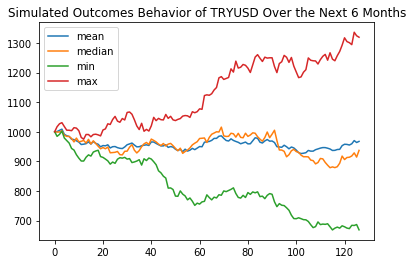

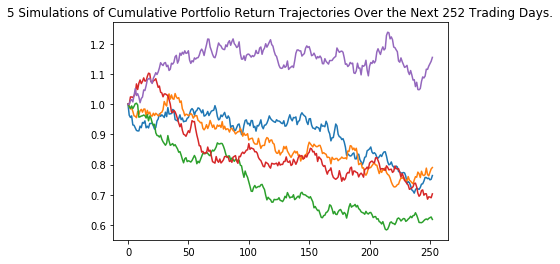

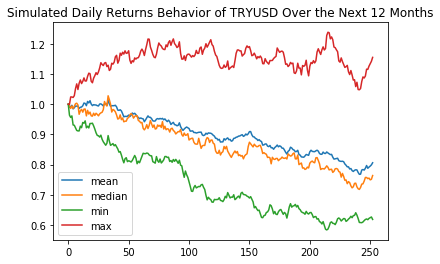

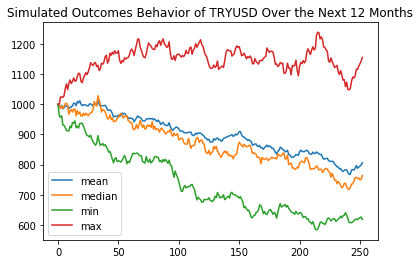

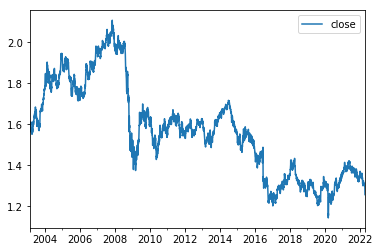

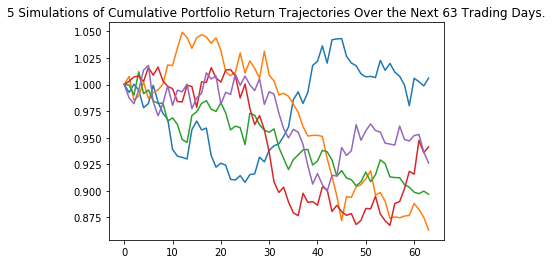

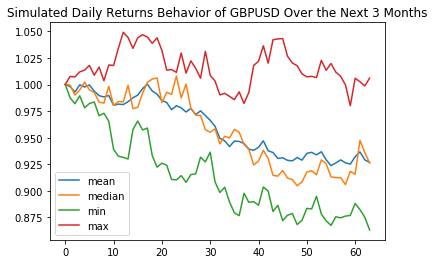

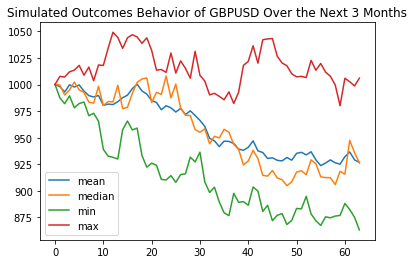

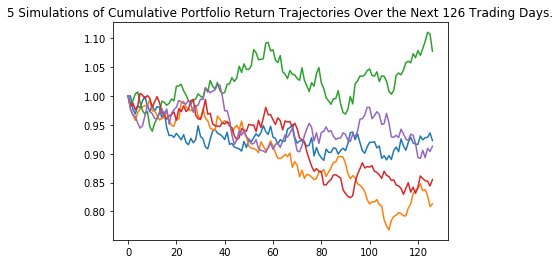

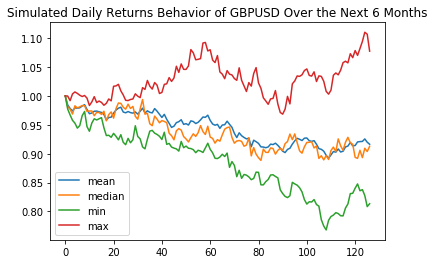

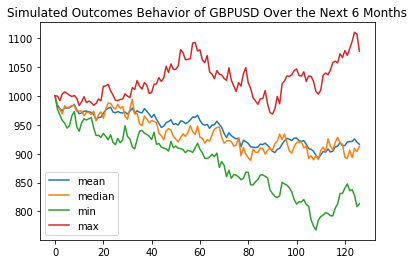

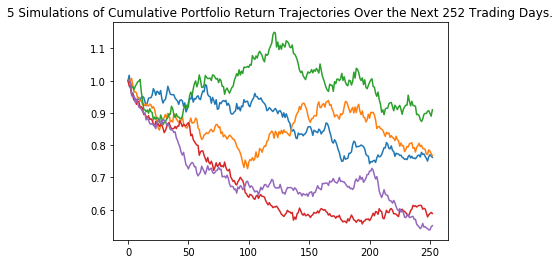

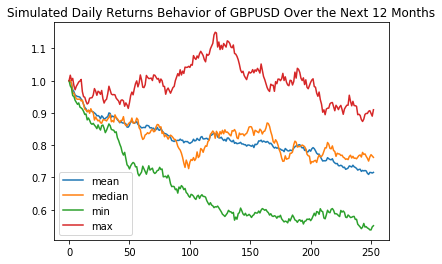

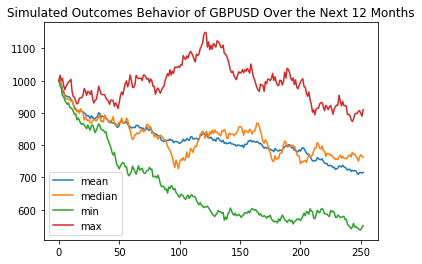

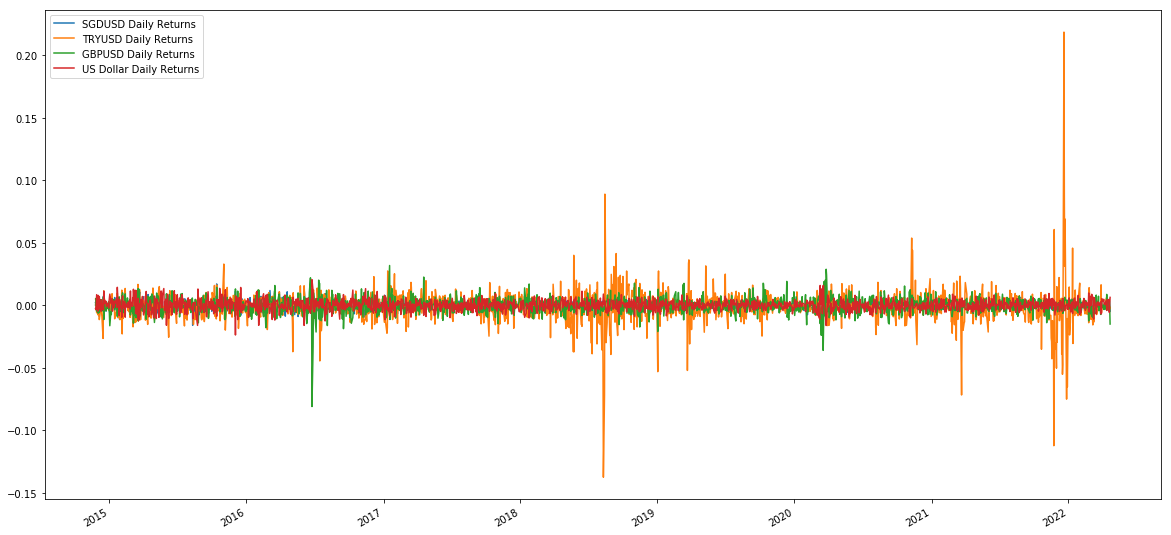

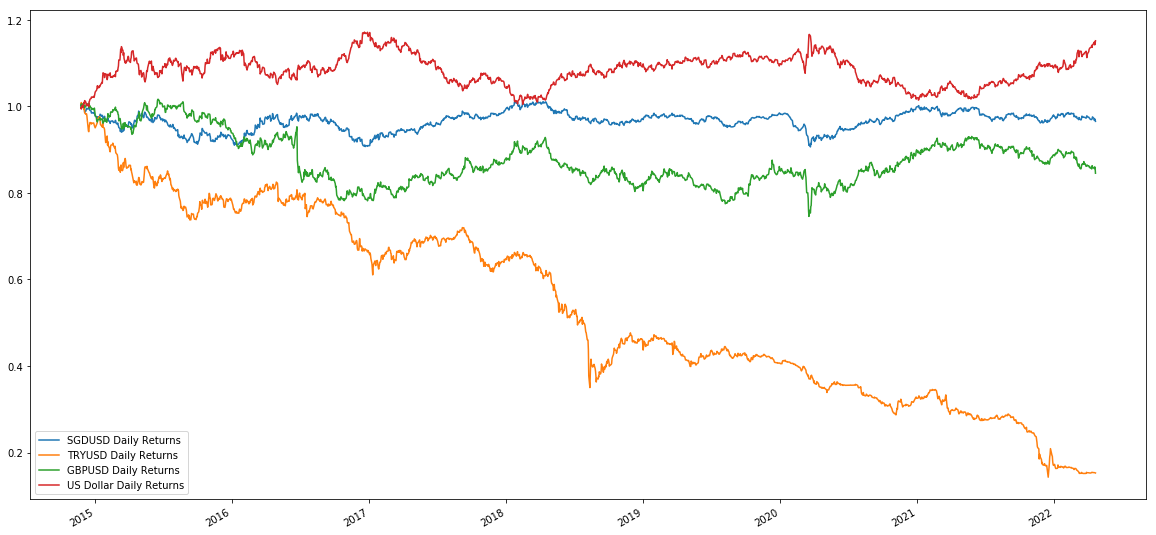

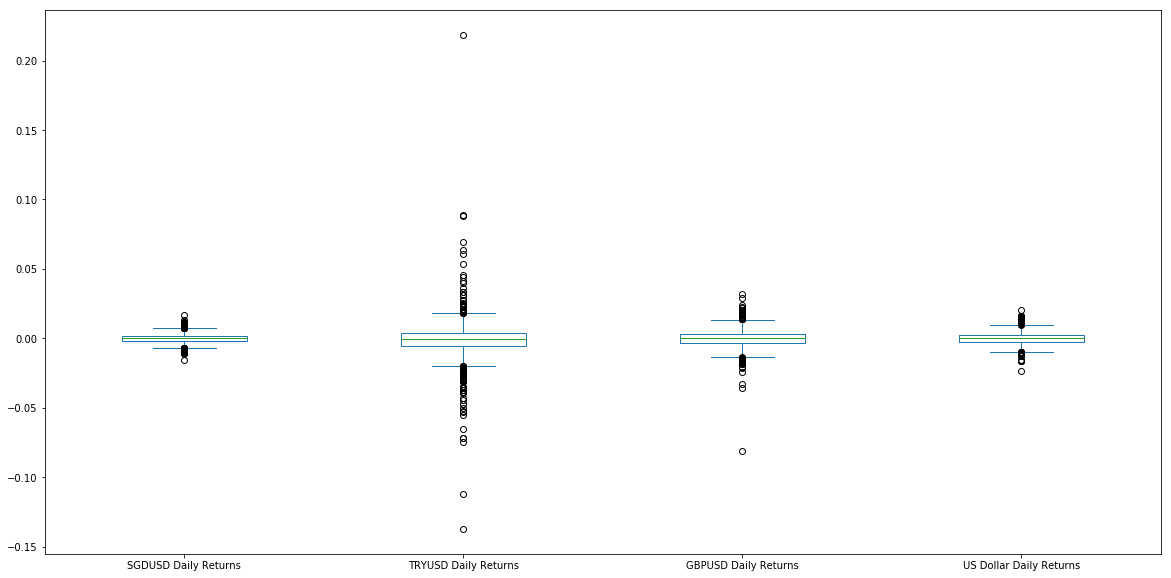

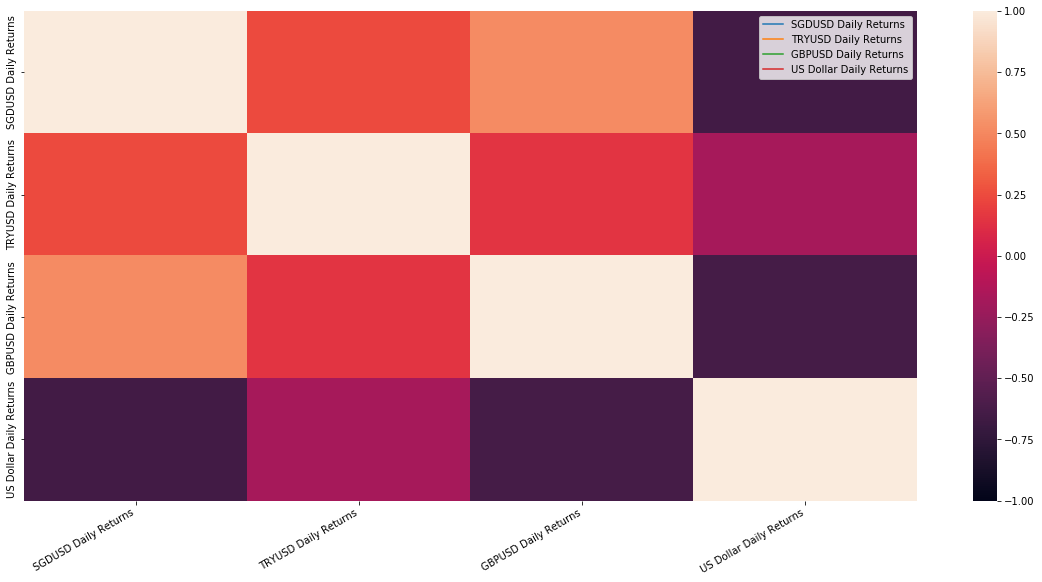

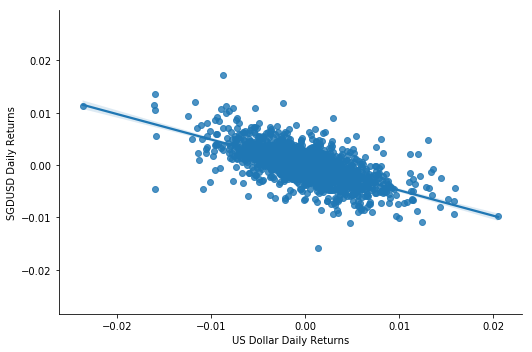

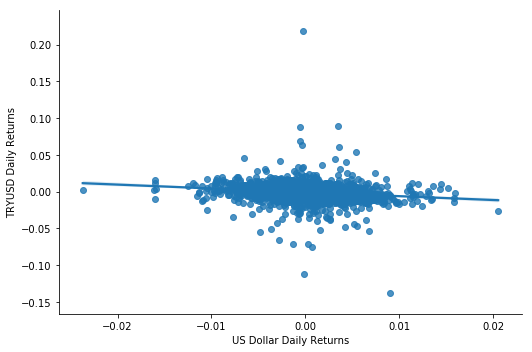

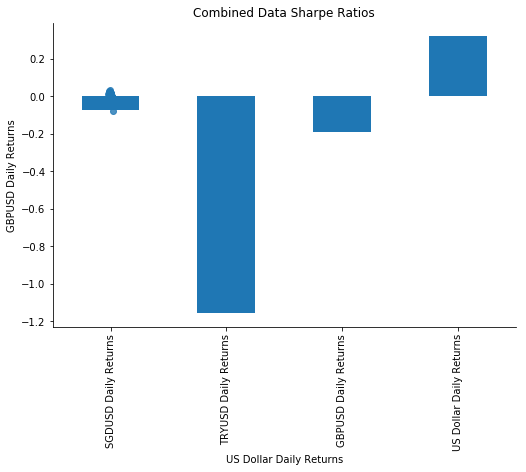

In [5]:
# Create a Title for the Dashboard

title = pn.pane.Markdown('''
        # Travel Planner Based on Currency Conversion Risk,
        ''',
       width = 400)

welcome = pn.pane.Markdown(

    '''
    ### This dashboard, created by Richie Garafola, Scott Phillips and Mark Staten presents a visual analysis of travel planning to any desired country in the world based on currency conversion risk. 
    ### You can navigate through the tabs above to explore more details about the evolution of using a pre determined budget and analyzing the risk of converting currency.
        ''',
    width = 400)

Singapore_Data = pn.Column('Singapore Analysis',singapore_currency_converter(),singapore_plot(),singapore_candle_stick_plot(),singapore_monte_carlo_3_months(),singapore_monte_carlo_6_months(),singapore_monte_carlo_12_months())
Turkey_Data = pn.Column('Turkey Analysis',turkey_currency_converter(),turkey_plot(),turkey_candle_stick_plot(),turkey_monte_carlo_3_months(),turkey_monte_carlo_6_months(),turkey_monte_carlo_12_months())
UK_Data = pn.Column('United Kingdom Analysis',uk_currency_converter(),uk_plot(),uk_candle_stick_plot(),uk_monte_carlo_3_months(),uk_monte_carlo_6_months(),uk_monte_carlo_12_months())
Risk = pn.Column('Risk',joined_data_plot(),cumulative_returns_plot(),joined_data_box_plot(),joined_forex_21_day_std_plot(),heatmap(),beta_plot(),beta_plot_2(),beta_plot_3(),combined_data_sharpe_ratio_plot())
# tabs = pn.Tabs(
#     ('Welcome',welcome),('Singapore',Singapore_Data),('Turkey',Turkey_Data),('United Kingdom',UK_Data),('Risk',Risk)
# )

tabs = pn.Tabs(
    ('Welcome',welcome),('Singapore',Singapore_Data),('Risk',Risk)
)

    #    ("welcome", pn.Column(world_map())))
    
        
#     ("Singapore Dollar", pn.Column(
    
        
#     ("Turkey Lira", pn.Column(
    
        
#     ("British Pound (Cable)", pn.Column(
    
        
#     ("Overview", pn.Column(
    
        
#     ("Singapore", pn.Column(
    
        
#     ("Turkey", pn.Column(
    
        
#     ("United Kingdom"
#     )))))))))))))))


    
  
    
    
    
    
    
    
    
    
    
    
    
    
### Currency Conversion
dashboard = pn.Column(pn.Row(title),tabs)

### Serve The Panel Dashboard

In [6]:
# Serve the dashboard
dashboard.servable()

Column
    [0] Row
        [0] Markdown(str, width=400)
    [1] Tabs
        [0] Markdown(str, width=400)
        [1] Column
            [0] Markdown(str)
            [1] Str(tuple)
            [2] Plotly(Figure)
            [3] Plotly(Figure)
            [4] Str(MCSimulation)
            [5] Str(MCSimulation)
            [6] Str(MCSimulation)
        [2] Column
            [0] Markdown(str)
            [1] Str(AxesSubplot)
            [2] Str(AxesSubplot)
            [3] Str(AxesSubplot)
            [4] Str(AxesSubplot)
            [5] Str(AxesSubplot)
            [6] Str(FacetGrid)
            [7] Str(FacetGrid)
            [8] Str(FacetGrid)
            [9] Str(AxesSubplot)

# Debugging

In [ ]:
singapore_plot()

In [ ]:
turkey_plot()

In [ ]:
uk_plot()

In [ ]:
singapore_candle_stick_plot()

In [ ]:
turkey_candle_stick_plot()

In [ ]:
uk_candle_stick_plot()

In [ ]:
singapore_currency_converter();

In [ ]:
turkey_currency_converter();

In [ ]:
uk_currency_converter();

In [ ]:
singapore_monte_carlo_3_months()

In [ ]:
singapore_monte_carlo_6_months()

In [ ]:
singapore_monte_carlo_12_months()

In [ ]:
turkey_monte_carlo_3_months()

In [ ]:
turkey_monte_carlo_6_months()

In [ ]:
turkey_monte_carlo_12_months()

In [ ]:
uk_monte_carlo_3_months()

In [ ]:
uk_monte_carlo_6_months()

In [ ]:
uk_monte_carlo_12_months()

In [ ]:
joined_data_plot()

In [ ]:
cumulative_returns_plot()

In [ ]:
joined_data_box_plot()

In [ ]:
joined_forex_21_day_std_plot()

In [ ]:
heatmap()

In [ ]:
beta_plot()

In [ ]:
beta_plot_2()

In [ ]:
beta_plot_3()

In [ ]:
combined_data_sharpe_ratio_plot()

In [ ]:
world_map() # <- not plotting yet